## Red Wine Quality Prediction

### Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer, RobustScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [62]:
df1=pd.read_csv(r"C:\Users\chaud\Downloads\winequality-red.csv")
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Description of Qualities
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [63]:
df1.shape

(1599, 12)

In [64]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Data Inspection

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [66]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [67]:
df1.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [68]:
for col in df1.columns:
    if df1[col].isnull().sum() > 0:
        df1[col] = df1[col].fillna(df1[col].mean())
 
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [69]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [70]:
df1['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Visualization

<Axes: xlabel='quality', ylabel='count'>

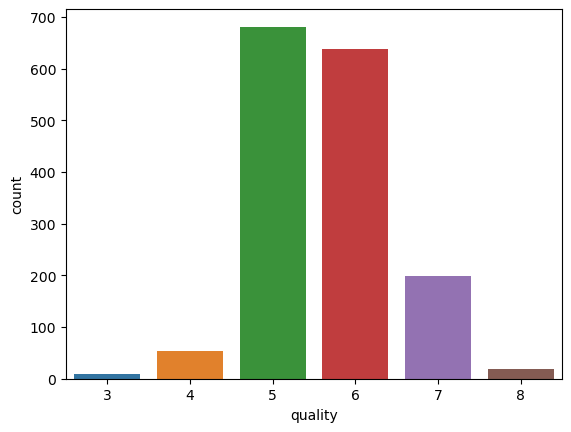

In [71]:
sns.countplot(x='quality',data=df1)

<Axes: >

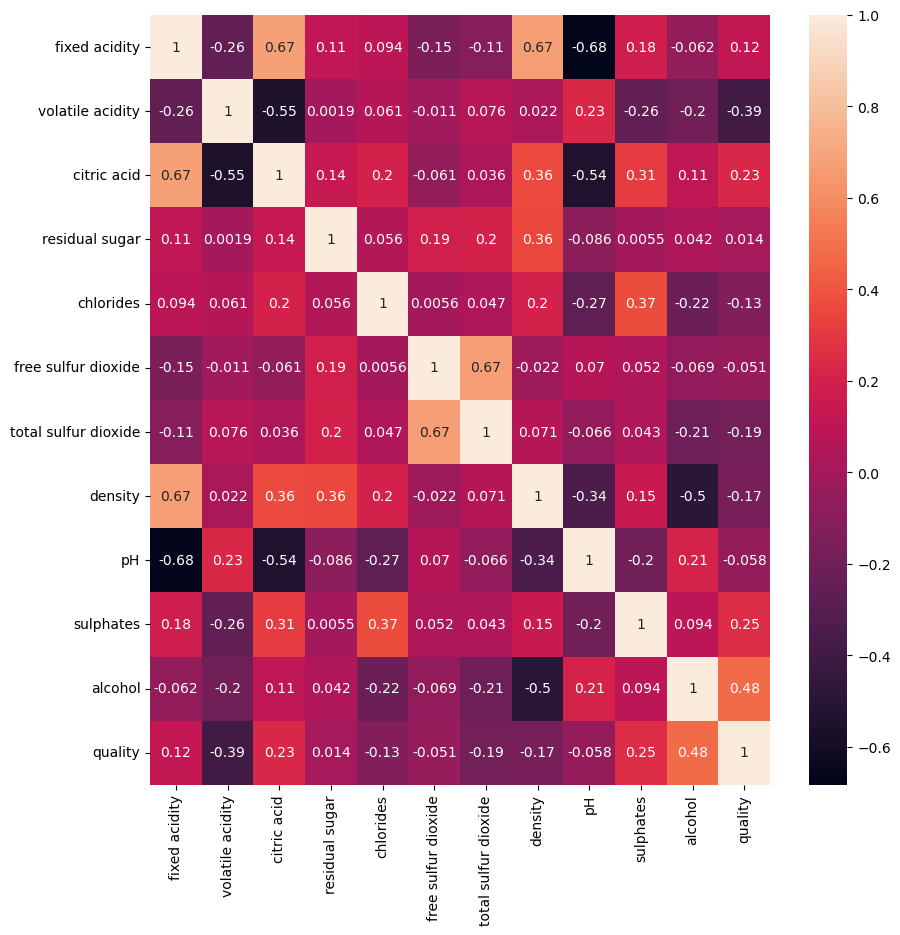

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),color='k',annot=True)

<Axes: xlabel='quality', ylabel='volatile acidity'>

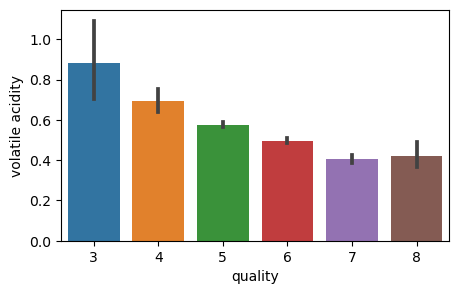

In [73]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df1)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality

<Axes: xlabel='quality', ylabel='fixed acidity'>

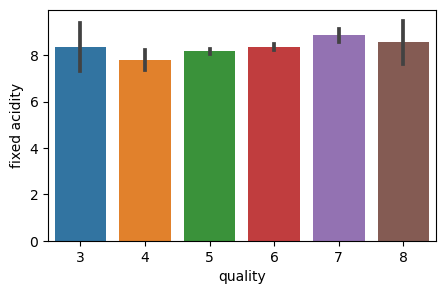

In [42]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df1)

Here we see that fixed acidity does not give any specification to classify the quality.

<Axes: xlabel='quality', ylabel='citric acid'>

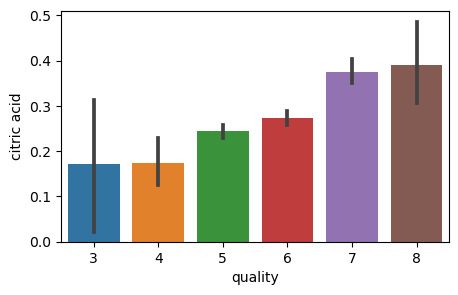

In [46]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'citric acid', data = df1)

Composition of citric acid go higher as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='residual sugar'>

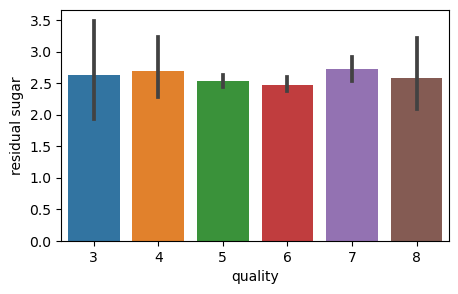

In [47]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = df1)

Here we see that residual sugar does not give any specification to classify the quality.

<Axes: xlabel='quality', ylabel='chlorides'>

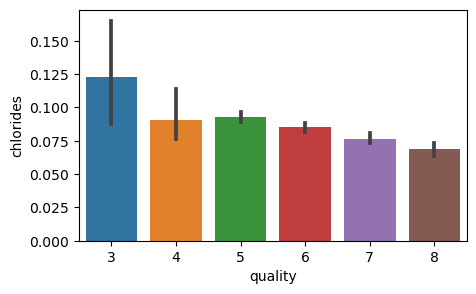

In [48]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'chlorides', data = df1)

Composition of chloride also go down as we go higher in the quality of the wine.

<Axes: xlabel='quality', ylabel='pH'>

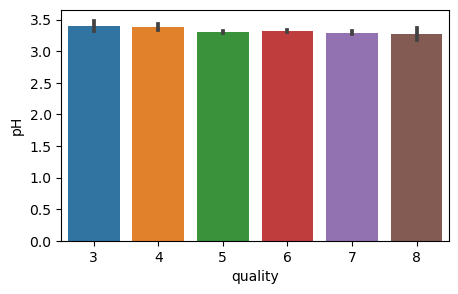

In [49]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'pH', data = df1)

<Axes: xlabel='quality', ylabel='alcohol'>

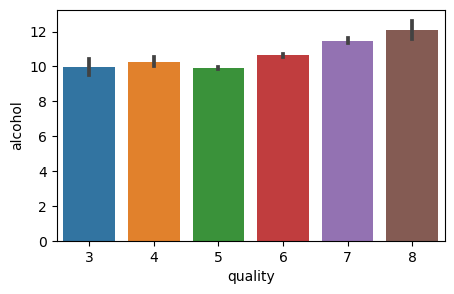

In [50]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = df1)

Alcohol level also goes higher as te quality of wine increases

<Axes: xlabel='quality', ylabel='alcohol'>

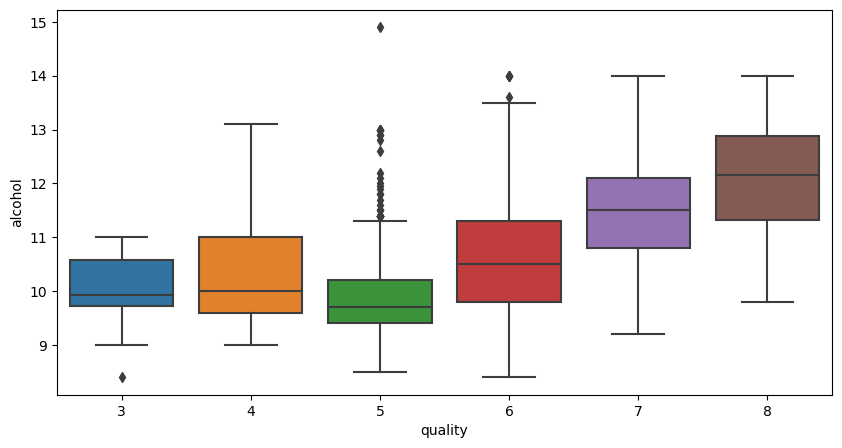

In [74]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'quality', y = 'alcohol', data = df1)

In [75]:
bins = (2,6.5,8)
group_names = ['bad','good']
df['class'] = pd.cut(df1['quality'], bins = bins, labels = group_names)


In [79]:
df['class'].value_counts()

bad     1382
good     217
Name: class, dtype: int64

In [80]:
data=df1.drop(columns='quality')

<Axes: xlabel='quality', ylabel='alcohol'>

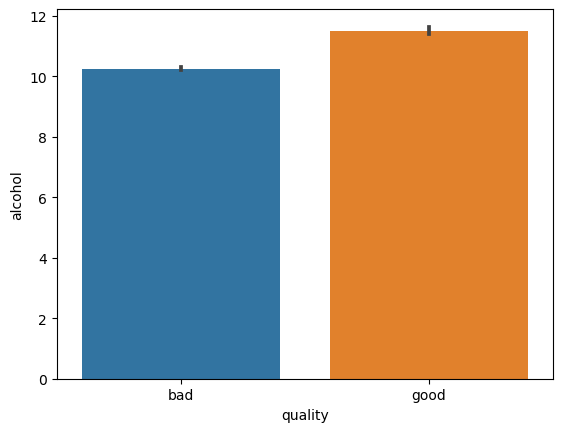

In [84]:
sns.barplot(x='quality', y='alcohol',data=df)

### Classification into ones and zeroes using Labelencoder

In [90]:
labelencoder_y = LabelEncoder()
df['class'] = labelencoder_y.fit_transform(df['class'])
df['class']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: class, Length: 1599, dtype: int32

In [96]:
X = df1.drop(['quality'], axis = 1)
y = df['class']

### Machine Learning

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
def models(X_train,y_train):
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)
    
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)

    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    forest = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    print("Logistic regression training accuracy: ", log.score(X_train, y_train))
    print("K nearest neighbour training accuracy: ", knn.score(X_train, y_train))
    print("support vector(linear classifier) training accuracy: ", svc_lin.score(X_train, y_train))
    print("support vector(RBF classifier) training accuracy: ", classifier.score(X_train, y_train))
    print("Gaussian NB training accuracy: ", gauss.score(X_train, y_train))
    print("Decision tree classifier training accuracy: ", tree.score(X_train, y_train))
    print("Random Forest classifier training accuracy: ", forest.score(X_train, y_train))

    return log, knn, svc_lin, classifier, gauss, tree, forest

In [113]:
model = models(X_train,y_train)

Logistic regression training accuracy:  0.8694292415949961
K nearest neighbour training accuracy:  0.8960125097732604
support vector(linear classifier) training accuracy:  0.8537920250195465
support vector(RBF classifier) training accuracy:  0.8553557466770915
Gaussian NB training accuracy:  0.8436278342455042
Decision tree classifier training accuracy:  1.0
Random Forest classifier training accuracy:  0.9913995308835027


In [116]:
for i in range(len(model)):
    cm=confusion_matrix(y_test, model[i].predict(X_test))
    TN,FN,FP,TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] testing accuracy= "{} !"'.format(i, (TP+TN) / (TP+TN+FN+FP)))
    print()

[[280  10]
 [ 18  12]]
Model[0] testing accuracy= "0.9125 !"

[[278  12]
 [ 18  12]]
Model[1] testing accuracy= "0.90625 !"

[[290   0]
 [ 30   0]]
Model[2] testing accuracy= "0.90625 !"

[[290   0]
 [ 30   0]]
Model[3] testing accuracy= "0.90625 !"

[[241  49]
 [  7  23]]
Model[4] testing accuracy= "0.825 !"

[[270  20]
 [ 10  20]]
Model[5] testing accuracy= "0.90625 !"

[[279  11]
 [ 12  18]]
Model[6] testing accuracy= "0.928125 !"



In [117]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [118]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [123]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 10)
Final_mod.fit(X_train,y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score : \n', accuracy_score(y_test, y_pred))

Accuracy Score : 
 0.921875


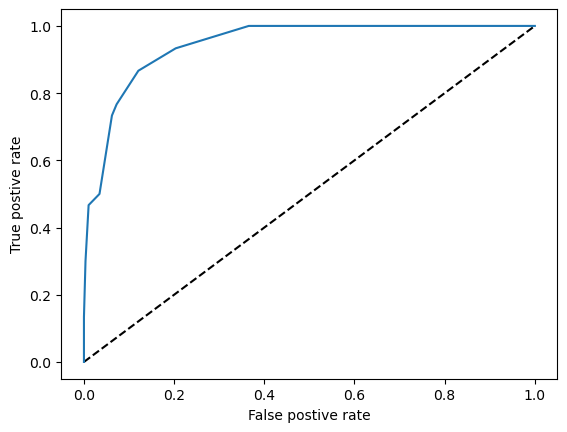

Auc Score : 
 0.7327586206896551


In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_mod.predict(X_test))
print('Auc Score : \n',auc_score)

In [127]:
import joblib
joblib.dump(Final_mod,'Red_Wine_Quality_Final.pkl')

['Red_Wine_Quality_Final.pkl']